In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Генернируем данные

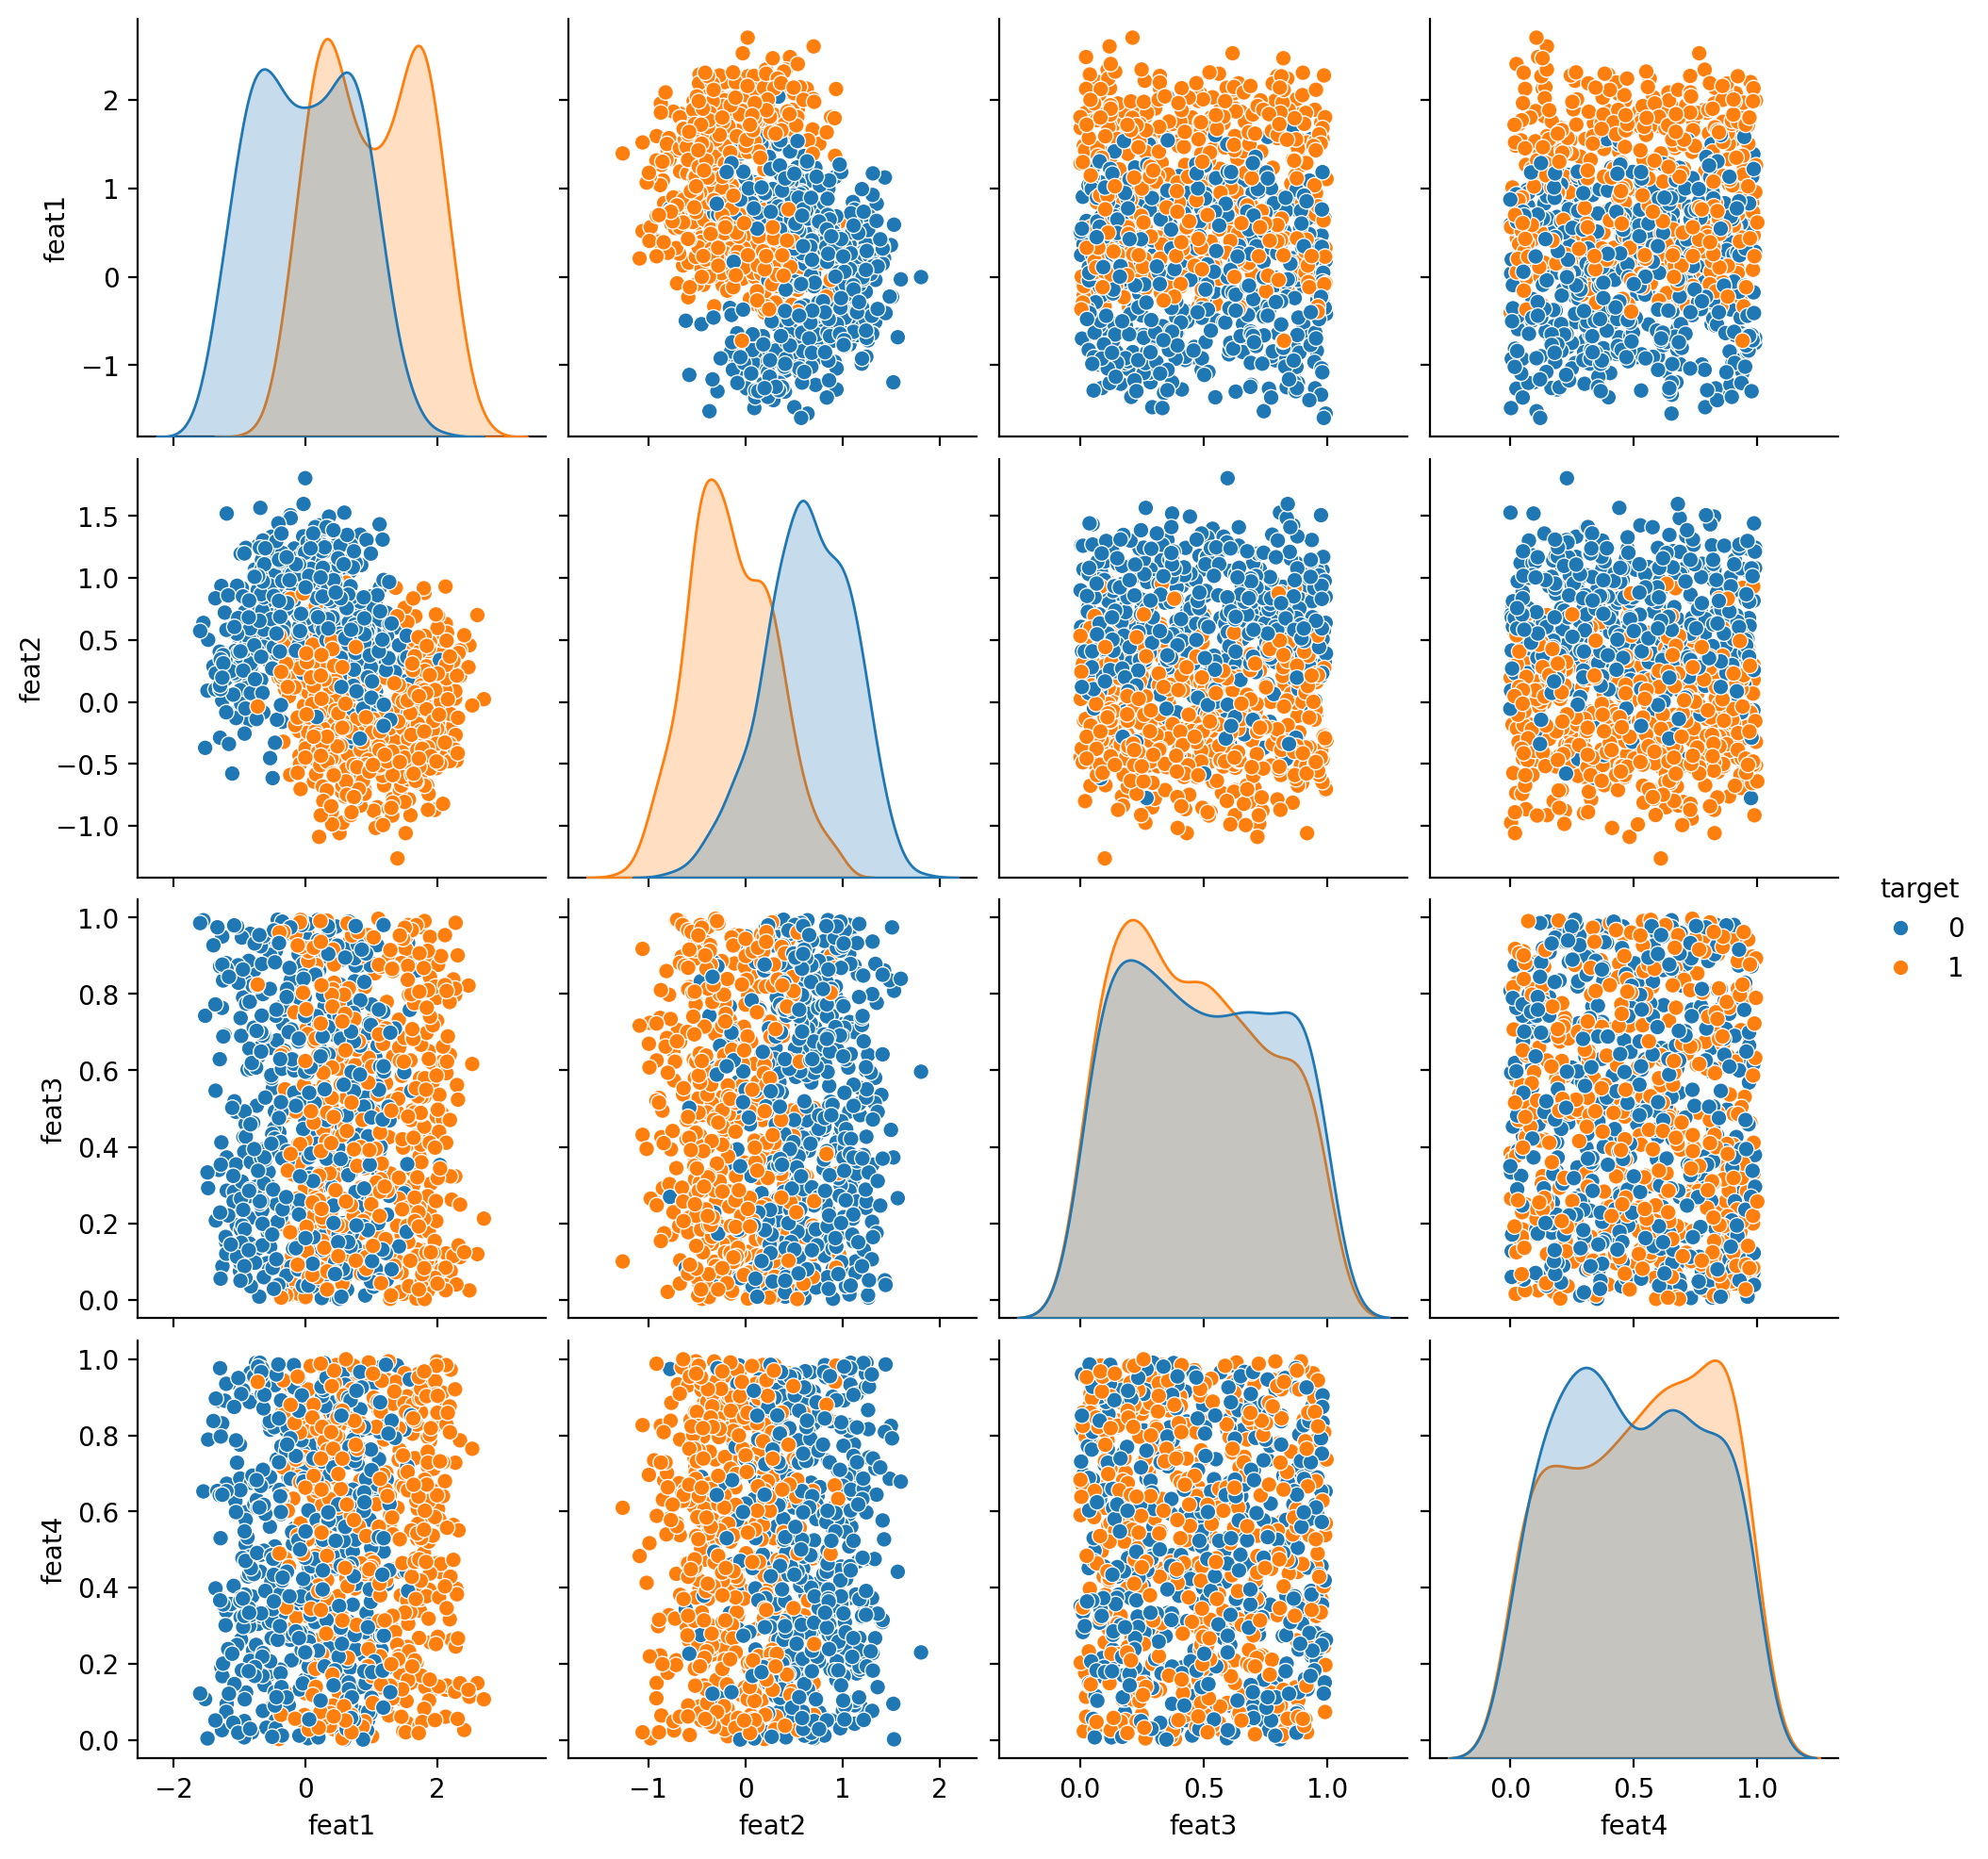

In [2]:
X, y = make_moons(n_samples=1_000, random_state=0, noise=0.3)

df = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat3': np.random.rand(X.shape[0]),
    'feat4': np.random.rand(X.shape[0]),
    'target': y
})

sns.pairplot(df, hue='target')

## Сравнение доступных алгоритмов

In [3]:
from pycaret.classification import setup, compare_models, tune_model, evaluate_model, create_model
from dask.distributed import Client
from pycaret.parallel import FugueBackend

In [4]:
s = setup(
  data=df, 
  target='target',
  n_jobs=1
)

,Description,Value
0,Session id,7608
1,Target,target
2,Target type,Binary
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(700, 5)"
6,Transformed test set shape,"(300, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [5]:
dask_client = Client()

In [6]:
%%time
best = compare_models(
  parallel=FugueBackend(dask_client)  
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9014,0.9455,0.9057,0.8992,0.9015,0.8029,0.8046,0.080
knn,K Neighbors Classifier,0.8986,0.9382,0.9029,0.8961,0.8989,0.7971,0.7981,0.009
et,Extra Trees Classifier,0.8971,0.9488,0.9057,0.8909,0.8974,0.7943,0.7958,0.050
gbc,Gradient Boosting Classifier,0.8929,0.9540,0.9029,0.8863,0.8937,0.7857,0.7875,0.069
ada,Ada Boost Classifier,0.8829,0.9521,0.8857,0.8825,0.8827,0.7657,0.7682,0.041
lightgbm,Light Gradient Boosting Machine,0.8771,0.9432,0.8800,0.8768,0.8775,0.7543,0.7558,0.026
dt,Decision Tree Classifier,0.8457,0.8457,0.8514,0.8458,0.8464,0.6914,0.6951,0.029
lr,Logistic Regression,0.8386,0.9249,0.8343,0.8447,0.8376,0.6771,0.6800,0.008
lda,Linear Discriminant Analysis,0.8386,0.9246,0.8343,0.8441,0.8376,0.6771,0.6795,0.008
nb,Naive Bayes,0.8371,0.9250,0.8371,0.8397,0.8369,0.6743,0.6767,0.008


CPU times: user 206 ms, sys: 25 ms, total: 231 ms
Wall time: 7.14 s


In [6]:
dask_client

<Client: 'tcp://172.18.0.5:8786' processes=3 threads=24, memory=6.00 GiB>